# seaborn ------ 案例分析
## 案例：华盛顿自行车租赁情况分析
### 步骤1：确认数据

In [1]:
import pandas as pd # 读取数据到DataFrame
import urllib # 获取网络数据
import tempfile # 创建临时文件系统
import shutil # 文件操作
import zipfile # 压缩解压

temp_dir = tempfile.mkdtemp() # 建立临时目录
data_source = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip' # 网络数据地址
zipname = temp_dir + '/Bike-Sharing-Dataset.zip' # 拼接文件和路径
urllib.urlretrieve(data_source, zipname) # 获得数据

zip_ref = zipfile.ZipFile(zipname, 'r') # 创建一个ZipFile对象处理压缩文件
zip_ref.extractall(temp_dir) # 解压
zip_ref.close()

daily_path = temp_dir + '/day.csv'
daily_data = pd.read_csv(daily_path) # 读取csv文件
daily_data['dteday'] = pd.to_datetime(daily_data['dteday']) # 把字符串数据传换成日期数据
drop_list = ['instant', 'season', 'yr', 'mnth', 'holiday', 'workingday', 'weathersit', 'atemp', 'hum'] # 不关注的列
daily_data.drop(drop_list, inplace = True, axis = 1) # inplace=true在对象上直接操作

shutil.rmtree(temp_dir) # 删除临时文件目录

daily_data.head() # 看一看数据哈~

,dteday,weekday,temp,windspeed,casual,registered,cnt
0,2011-01-01,6,0.344167,0.160446,331,654,985
1,2011-01-02,0,0.363478,0.248539,131,670,801
2,2011-01-03,1,0.196364,0.248309,120,1229,1349
3,2011-01-04,2,0.200000,0.160296,108,1454,1562
4,2011-01-05,3,0.226957,0.186900,82,1518,1600


### 步骤2：配置参数

In [2]:
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
sns.set_style("white")

### 步骤3：关联分析
* lmplot

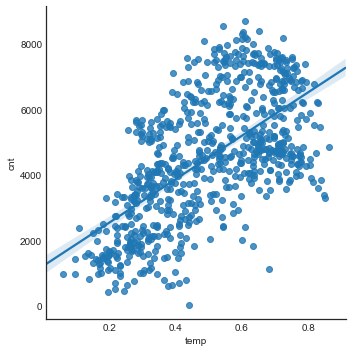

In [3]:
g = sns.lmplot(x="temp", y="cnt", data=daily_data)

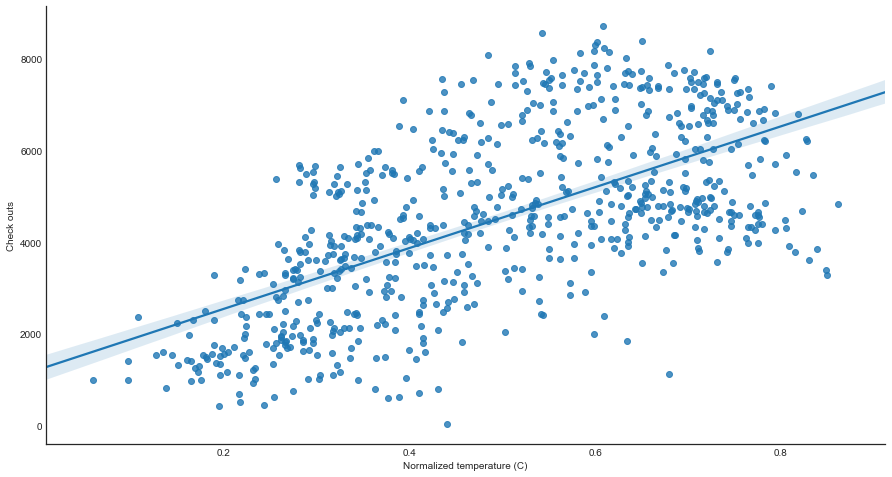

In [4]:
g = sns.lmplot(x="temp", y="cnt", data=daily_data)
g.fig.set_size_inches(14, 7)
g.set_axis_labels('Normalized temperature (C)', 'Check outs')

### 步骤4：分布分析
* distplot
* jointplot

In [5]:
daily_data.head()

,dteday,weekday,temp,windspeed,casual,registered,cnt
0,2011-01-01,6,0.344167,0.160446,331,654,985
1,2011-01-02,0,0.363478,0.248539,131,670,801
2,2011-01-03,1,0.196364,0.248309,120,1229,1349
3,2011-01-04,2,0.200000,0.160296,108,1454,1562
4,2011-01-05,3,0.226957,0.186900,82,1518,1600


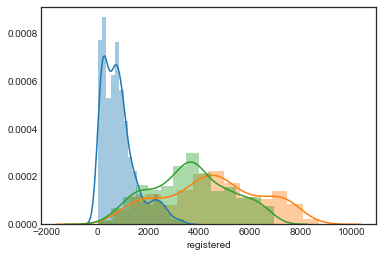

In [6]:
sns.distplot(daily_data["casual"])
sns.distplot(daily_data["cnt"])
sns.distplot(daily_data["registered"])

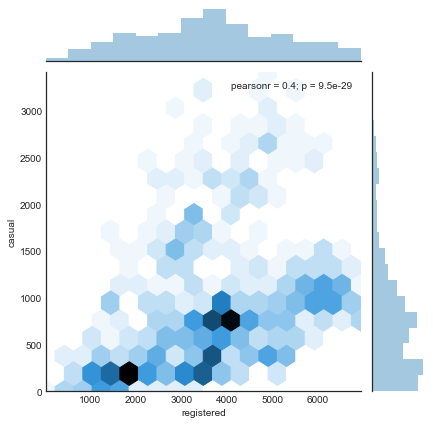

In [7]:
sns.jointplot(data=daily_data, x="registered", y="casual", kind="hex")

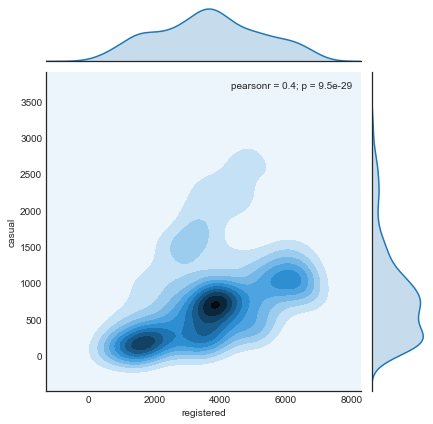

In [8]:
sns.jointplot(data=daily_data, x="registered", y="casual", kind="kde")

### 步骤5：组间分析

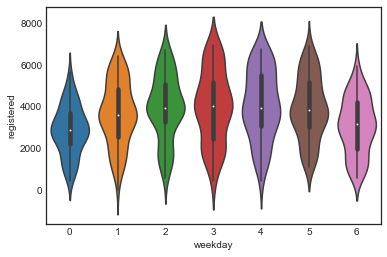

In [9]:
sns.violinplot(data=daily_data, x="weekday", y="registered", scale="width")

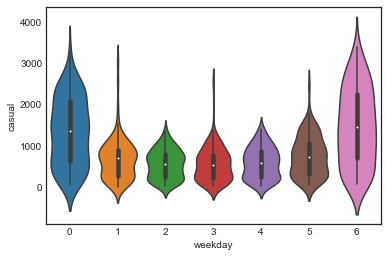

In [10]:
sns.violinplot(data=daily_data, x="weekday", y="casual", scale="width") # count, area, width

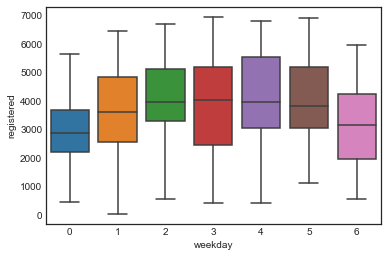

In [11]:
sns.boxplot(data=daily_data, x="weekday", y="registered")

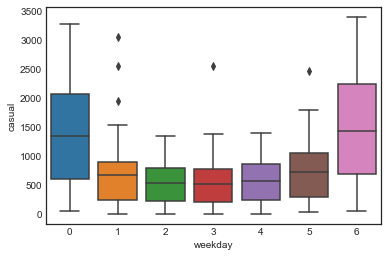

In [12]:
sns.boxplot(data=daily_data, x="weekday", y="casual")